#**Analisis Pola Penjualan dan Minat Konsumen Adidas di Berbagai Wilayah Amerika Serikat**

#**Import Library**

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Memuat Dataset**

In [84]:
file = "/content/data_sales (1).csv.zip"
df = pd.read_csv(file)

# Convert 'Invoice Date' to datetime
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Clean and convert 'Price per Unit' to float
df['Price per Unit'] = df['Price per Unit'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')

# Clean and convert 'Units Sold' to int
df['Units Sold'] = df['Units Sold'].astype(str).str.replace(',', '', regex=False).str.strip()
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce').fillna(0).astype(int) # Fill NaN with 0 before converting to int

# Clean and convert 'Total Sales' to float
df['Total Sales'] = df['Total Sales'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')

# Clean and convert 'Operating Profit' to float
df['Operating Profit'] = df['Operating Profit'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')

In [85]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,2021-06-17,Southeast,Florida,Orlando,Women's Apparel,103.0,218,2245,1257,Online
1,West Gear,1128299,2021-07-16,South,Louisiana,New Orleans,Women's Apparel,103.0,163,1679,806,Online
2,Sports Direct,1197831,2021-08-25,South,Alabama,Birmingham,Men's Street Footwear,10.0,700,7000,3150,Outlet
3,Sports Direct,1197831,2021-08-27,South,Alabama,Birmingham,Women's Street Footwear,15.0,575,8625,3881,Outlet
4,Sports Direct,1197831,2021-08-21,South,Alabama,Birmingham,Women's Street Footwear,15.0,475,7125,3206,Outlet


In [86]:
df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
9636,Amazon,1185732,2021-11-18,Northeast,Maine,Portland,Men's Apparel,65.0,150,9750,2438,Outlet
9637,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Women's Athletic Footwear,65.0,150,9750,2438,Outlet
9638,Amazon,1185732,2021-10-22,West,Alaska,Anchorage,Men's Apparel,75.0,150,11250,2813,Outlet
9639,West Gear,1185732,2021-04-10,Midwest,Indiana,Indianapolis,Men's Apparel,65.0,150,9750,2925,In-store
9640,Sports Direct,1185732,2021-10-05,Northeast,Connecticut,Hartford,Men's Apparel,65.0,150,9750,2925,In-store


#**Business Understanding**

##**Business Objective**

Dataset penjualan adidas ini merupakan kumpulan data yang mencakup informasi tentang penjualan produk adidas. Dataset ini mencakup detail seperti jumlah unit yang terjual, total pendapatan penjualan, jenis produk yang terjual, metode penjualan, harga per unit barang, serta informasi relevan lainnya. Dalam dataset ini terdapat 9.640 baris dan 12 kolom. Data ini mencakup catatan penjualan dari berbagai peritel besar seperti Walmart, Foot Locker, West Gear, Sports Direct, Kohl's, dan Amazon di berbagai wilayah Amerika Serikat selama periode 2020 hingga 2021. Produk yang dijual meliputi pakaian dan alas kaki untuk pria dan wanita. Manajemen ingin mengetahui performa penjualan untuk meningkatkan strategi pemasaran dan distribusi produk yang mereka jual.

Permasalahan:
1. Produk mana yang memiliki profit margin tertinggi?
2. Wilayah mana yang memiliki penjualan dan profit paling tinggi?
3. Apakah terdapat perbedaan performa penjualan antara kota besar dan kota kecil?
4. Metode penjualan mana yang lebih efektif?

##**Assess Situation**

Situasi dalam dataset ini mencerminkan model bisnis modern, di mana produk Adidas dijual melalui berbagai peritel (Walmart, Amazon, Foot Locker, dll) dengan metode yang beragam (Online, In-store, Outlet). Tantangannya yaitu membedakan apakah selera pembeli dipengaruhi dari lokasi tempat tinggalnya atau dari toko tempat mereka belanja.

Data ini juga menyajikan informasi mengenai perbedaan karakteristik antarwilayah, yang memungkinkan perusahaan untuk menyesuaikan stok barang sesuai dengan minat konsumen di lokasi geografis tertentu. Tantangannya yaitu menentukan apakah sebuah produk yang laku di suatu wilayah, memang karena minat murni masyarakat setempat atau karena faktor eksternal sementara(cuaca sesaat, pengaruh diskon besar di satu toko, atau kemungkinan lainnya).

Data ini juga masih berupa kumpulan transaksi dan belum dianalisis untuk melihat pola, tren, maupun performa tiap produk dan wilayah. Tanpa adanya analisis pola dan tren, perusahaan cenderung mengambil keputusan berdasarkan pengamatan sekilas saja. Tantangannya, menyebabkan salah sasaran. Misalnya, perusahaan mungkin menganggap sebuah produk gagal karena penjualan harian yang rendah, padahal jika dianalisis secara tren, produk tersebut sedang mengalami pertumbuhan stabil di wilayah tertentu.

##**Analytic Goals**

Analisis ini bertujuan untuk memahami pola penjualan harian dengan menghitung rata-rata, nilai tengah, dan kestabilan angka penjualan. Selain itu, studi ini ingin melihat apakah perubahan harga berpengaruh pada jumlah barang yang terjual, serta membandingkan keuntungan antarwilayah dan jenis toko (toko fisik, online, atau outlet). Hasilnya akan digunakan sebagai panduan bagi perusahaan untuk mengatur stok barang dengan lebih tepat dan merancang strategi pemasaran yang lebih efektif di setiap daerah.

##**Project Plan**

Project plan ini dimulai dengan merapikan format data agar siap dihitung, lalu dilanjutkan dengan menghitung angka rata-rata dan stabilitas penjualan harian. Setelah itu, akan dilakukan analisis hubungan antara harga, jumlah pembeli, dan keuntungan di setiap daerah. Hasil akhirnya adalah rekomendasi strategi untuk menentukan lokasi penambahan stok serta cara promosi yang paling efektif guna meningkatkan penjualan.

#**Data Understanding**

## **Deskripsi Data**

### **Informasi Dasar**

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9641 non-null   object        
 1   Retailer ID       9641 non-null   int64         
 2   Invoice Date      9641 non-null   datetime64[ns]
 3   Region            9641 non-null   object        
 4   State             9641 non-null   object        
 5   City              9641 non-null   object        
 6   Product           9641 non-null   object        
 7   Price per Unit    9639 non-null   float64       
 8   Units Sold        9641 non-null   int64         
 9   Total Sales       9641 non-null   int64         
 10  Operating Profit  9641 non-null   int64         
 11  Sales Method      9641 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 904.0+ KB


Berdasarkan data di atas, dapat diketahui bahwa dataset ini memiliki 9641 Baris dan 12 Kolom

### **Informasi Lanjutan**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9641 non-null   object        
 1   Retailer ID       9641 non-null   int64         
 2   Invoice Date      9641 non-null   datetime64[ns]
 3   Region            9641 non-null   object        
 4   State             9641 non-null   object        
 5   City              9641 non-null   object        
 6   Product           9641 non-null   object        
 7   Price per Unit    9639 non-null   float64       
 8   Units Sold        9641 non-null   int64         
 9   Total Sales       9641 non-null   int64         
 10  Operating Profit  9641 non-null   int64         
 11  Sales Method      9641 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 904.0+ KB


1. Retailer: Jumlah baris: 9641, Tipe data: object, Deskripsi: pengecer.
2. Retailer ID: Jumlah baris: 9641, Tipe data: int64, Deskripsi: ID pengecer.
3. Invoice Date: Jumlah baris: 9641, Tipe data: Object, Deskripsi: tanggal faktur.
4. Region: Jumlah baris: 9641, Tipe data: Object, Deskripsi: wilayah.
5. State: Jumlah baris: 9641, Tipe data: Object, Deskripsi: negara.
6. City: Jumlah baris: 9641, Tipe data: Object, Deskripsi: kota.
7. Product: Jumlah baris: 9641, Tipe data: Object, Deskripsi: produk.
8. Price per Unit: Jumlah baris: 9639, Tipe data: Object, Deskripsi: harga per satuan.
9. Units Sold: Jumlah baris: 9641, Tipe data: Object, Deskripsi: unit terjual.
10. Total Sales: Jumlah baris: 9641, Tipe data: Object, Deskripsi: jumlah penjualan.
11. Operating Profit: Jumlah baris: 9641, Tipe data: Object, Deskripsi: laba usaha.
12. Sales Method: Jumlah baris: 9641, Tipe data: Object, Deskripsi: metode penjualan.

### **Informasi Statistik Deskriptif**

In [89]:
df.describe(include='all')

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9641,9.641000e+03,9641,9641,9641,9641,9641,9639.000000,9641.000000,9641.000000,9641.000000,9641
unique,6,NaN,NaN,5,50,52,7,NaN,NaN,NaN,NaN,3
top,Foot Locker,NaN,NaN,West,Texas,Portland,Men's Street Footwear,NaN,NaN,NaN,NaN,Online
freq,2634,NaN,NaN,2446,430,360,1610,NaN,NaN,NaN,NaN,4889
mean,NaN,1.173851e+06,2021-05-10 17:09:06.291878400,NaN,NaN,NaN,NaN,45.212159,256.779483,9316.467898,3439.278498,NaN
min,NaN,1.128299e+06,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,7.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1.185732e+06,2021-02-17 00:00:00,NaN,NaN,NaN,NaN,35.000000,106.000000,425.000000,192.000000,NaN
50%,NaN,1.185732e+06,2021-06-04 00:00:00,NaN,NaN,NaN,NaN,45.000000,176.000000,957.000000,437.000000,NaN
75%,NaN,1.185732e+06,2021-09-16 00:00:00,NaN,NaN,NaN,NaN,55.000000,350.000000,15000.000000,5200.000000,NaN
max,NaN,1.197831e+06,2021-12-31 00:00:00,NaN,NaN,NaN,NaN,110.000000,1275.000000,82500.000000,39000.000000,NaN


Dapat diambil insight:
1. dari jumlah coun 9641, ada satu kolom yang memiliki miss yaitu kolom Price per Units dengan jumlah kolm hanya 9639. Sebanyak 2 kolom hilang.
2. "Foot Locker" muncul sebagai retailer yang paling sering bertransaksi (top), dengan frekuensi sebanyak 2.634 kali.
3. "Men's Street Footwear" adalah kategori produk yang paling sering muncul (1.610 kali). Dapat disimpulkan bahwa produk ini adalah produk terlaris.
4. Wilayah "West" (Barat) adalah region yang paling aktif melakukan transaksi (muncul 2.446 kali).
5. Kota Portland tercatat sebagai lokasi dengan transaksi paling sering (360 kali).
6. Rata-rata harga produk berada di sekitar 45,21. Namun, ada variasi besar karena harga minimumnya cuma 7 dan maksimum mencapai 110. Ini berarti sebagian besar produk yang terjual harganya murah hingga menengah.
7. Rata-rata unit yang terjual per transaksi adalah 256 unit, dengan angka maksimal mencapai 1.275 unit. Menampilkan adanya outliers pada data ini. Kemungkinan transaksi bukan dilakukan oleh perorangan.
8. Rata rata keuntungan per transaksi adalah sekitar 3.439. Sedangkan, nilai maksimal profit dalam satu transaksi bisa mencapai 39.000. Dapat disimpulkan bahwa Mayoritas transaksi mungkin menghasilkan profit di bawah 3.439, tetapi ada beberapa transaksi bernilai fantastis yang membuat angka rata-rata tersebut ke atas. Tanpa transaksi-transaksi besar ini, rata-rata profit mungkin akan jauh lebih kecil.

## **VERIFIKASI KUALITAS DATA**


### **Data Type Check**

In [90]:
df.dtypes

,0
Retailer,object
Retailer ID,int64
Invoice Date,datetime64[ns]
Region,object
State,object
City,object
Product,object
Price per Unit,float64
Units Sold,int64
Total Sales,int64


Dapat diambil dari informasi diatas, bahwa:
1. Seharusnya kolom Invoice Date bertipe data date, bukan object.
2. Seharusnya kolom Price per Unit bertipe data float, bukan object.
3. Seharusnya kolom Units Sold bertipe data int, bukan object.
4. Seharusnya kolom Total Sales bertipe data float, bukan object.
5. Seharusnya kolom Operating Profit bertipe data float, bukan object.

### **Incosistent Values**

Pada tahap ini dilakukan pemeriksaan terhadap konsistensi data, terutama dalam hal penulisan atau format. Proses ini penting untuk memastikan tidak ada data yang sebenarnya sama tetapi terbaca berbeda oleh sistem karena perbedaan penulisan.

In [91]:
print(df['Retailer'].unique())

['Walmart' 'West Gear' 'Sports Direct' 'Foot Locker' 'Amazon' "Kohl's"]


In [92]:
print(df['Invoice Date'].unique())

<DatetimeArray>
['2021-06-17 00:00:00', '2021-07-16 00:00:00', '2021-08-25 00:00:00',
 '2021-08-27 00:00:00', '2021-08-21 00:00:00', '2021-01-11 00:00:00',
 '2021-11-17 00:00:00', '2021-01-23 00:00:00', '2021-04-03 00:00:00',
 '2020-03-10 00:00:00',
 ...
 '2020-11-26 00:00:00', '2020-03-19 00:00:00', '2020-06-17 00:00:00',
 '2021-11-30 00:00:00', '2021-12-07 00:00:00', '2020-06-23 00:00:00',
 '2021-11-25 00:00:00', '2020-06-11 00:00:00', '2020-04-06 00:00:00',
 '2020-04-12 00:00:00']
Length: 724, dtype: datetime64[ns]


In [93]:
print(df['Region'].unique())

['Southeast' 'South' 'Midwest' 'Northeast' 'West']


In [94]:
print(df['State'].unique())

['Florida' 'Louisiana' 'Alabama' 'Missouri' 'Mississippi' 'Wisconsin'
 'New York' 'Michigan' 'Utah' 'Ohio' 'Arkansas' 'Georgia' 'Texas'
 'Oklahoma' 'West Virginia' 'California' 'South Carolina' 'Kansas'
 'Tennessee' 'North Carolina' 'Idaho' 'Indiana' 'New Jersey' 'Oregon'
 'South Dakota' 'North Dakota' 'Iowa' 'Maryland' 'Delaware' 'Washington'
 'Virginia' 'Wyoming' 'Minnesota' 'Kentucky' 'Connecticut' 'Rhode Island'
 'Massachusetts' 'New Mexico' 'Nevada' 'Illinois' 'Nebraska' 'Maine'
 'Arizona' 'Vermont' 'New Hampshire' 'Hawaii' 'Montana' 'Colorado'
 'Pennsylvania' 'Alaska']


In [95]:
print(df['City'].unique())

['Orlando' 'New Orleans' 'Birmingham' 'St. Louis' 'Jackson' 'Milwaukee'
 'New York' 'Detroit' 'Salt Lake City' 'Columbus' 'Little Rock' 'Atlanta'
 'Houston' 'Oklahoma City' 'Charleston' 'San Francisco' 'Dallas' 'Wichita'
 'Miami' 'Knoxville' 'Los Angeles' 'Charlotte' 'Boise' 'Indianapolis'
 'Newark' 'Portland' 'Sioux Falls' 'Fargo' 'Des Moines' 'Baltimore'
 'Wilmington' 'Seattle' 'Richmond' 'Albany' 'Cheyenne' 'Minneapolis'
 'Louisville' 'Hartford' 'Providence' 'Boston' 'Albuquerque' 'Las Vegas'
 'Chicago' 'Omaha' 'Phoenix' 'Burlington' 'Manchester' 'Honolulu'
 'Billings' 'Denver' 'Philadelphia' 'Anchorage']


In [96]:
print(df['Product'].unique())

["Women's Apparel" "Men's Street Footwear" "Women's Street Footwear"
 "Men's Athletic Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Men's aparel"]


In [97]:
print(df['Price per Unit'].unique())

[103.  10.  15.  20.  44.  48.  39.  46.  47.  40.  33.  34.  31.  41.
  29.  56.  37.  25.  32.  36.  43.  45.  38.  26.  42.  35.  50.  62.
  58.  63.  53.  30.  59.  54.  28.  24.  27.  55.  61.  23.  60.  64.
  51.  52.  68.  67.  86.  66.  49.  74.  83.  69.  57.  79.  73.  65.
  22.  80.  21.  12.  77.  72.  76.  13.  70.  82.  19.  88.   7.  14.
  71.  16.  17.  87.  18.  81.  78.   9.  92.  85.  90.  89. 100.  75.
  11.  95.  98.  96.  97. 101.  84.   8. 110. 105.  nan]


In [98]:
print(df['Units Sold'].unique())

[ 218  163  700  575  475  450  434  425  420  408  403  400  390  388
  384  376  375  374  372  366  360  359  355  354  352  350  349  347
  345  341  340  338  336  333  332  330  326  325  324  323  322  320
  319  318  317  315  314  313  312  311  310  308  306  305  304  302
  300  299  298  297  296  295  294  293  290  289  288  287  286  285
  284  283  282  281  280  279  278  277  276  275  273  272  271  270
  268  267  265  264  263  261  260  259  258  257  256  255  254  252
  250  248  247  246  245  244  243  241  240  239  238  236  234  233
  232  231  230  228  225  224  223  221  220  219  217  216  215  213
  210  209  208  207  206  204  203  202  201  200  198  196  195  194
  193  192  191  190  189  188  187  186  185  184  182  181  180  179
  178  177  176  175  174  173  171  170  169  168  167  166  165  164
  162  161  160  158  157  156  155  154  153  152  151  150  149  147
  146  145  144  143  142  141  140  139  138  137  136  135  134  133
  132 

In [99]:
print(df['Total Sales'].unique())

[ 2245  1679  7000 ...  9900 11700 10725]


In [100]:
print(df['Operating Profit'].unique())

[1257  806 3150 ... 4290 7394 2925]


In [101]:
print(df['Sales Method'].unique())

['Online' 'Outlet' 'In-store']


Dari beberapa informasi diatas mengenai inconsistent values, semua data merupakan data yang menjaga konsistensi penulisannya. Tidak ada data yang tidak konsisten penulisannya.

### **Missing Values**

In [102]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Retailer,0.000000
Retailer ID,0.000000
Invoice Date,0.000000
Region,0.000000
State,0.000000
City,0.000000
Product,0.000000
Price per Unit,0.020745
Units Sold,0.000000
Total Sales,0.000000


Dari informasi diatas mengenai missing values, pada kolom Price per Unit terdapat miss tapi tidak banyak.

### **Duplicated Values**

In [103]:
df[df.duplicated()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method


Dapat dilihat dari informasi diatas, bahwasanya pada dataset ini tidak ada duplikasi.

### **Outliers Values**

In [104]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Retailer ID,45.420600
Price per Unit,0.840162
Units Sold,5.258791
Total Sales,6.762784
Operating Profit,7.312519


Dari Kolom Persentase Outliers diatas, dapat kita lihat bahwa untuk kolom Retailer ID memiliki outliers sebesar 45%.

# **Eksplorasi Data (EDA)**

## **Comparison/Perbandingan**

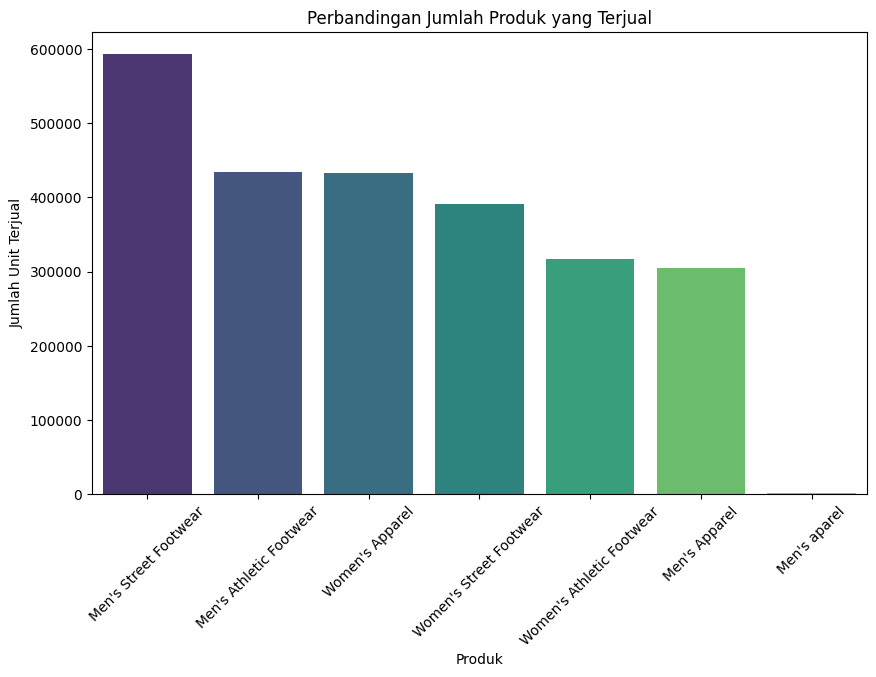

In [105]:
penjualan = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=penjualan.index, y=penjualan.values, palette='viridis', hue=penjualan.index, legend=False)
plt.title('Perbandingan Jumlah Produk yang Terjual')
plt.xlabel('Produk')
plt.ylabel('Jumlah Unit Terjual')
plt.xticks(rotation=45)
plt.show()

Analisis ini dilakukan dengan membandingkan total penjualan dari setiap produk yang dijual. Tujuannya adalah untuk mengetahui produk mana yang memiliki penjualan paling tinggi dan produk mana yang penjualannya paling rendah. Dan dari informasi diatas, bahwasanya produk dengan penjualan paling tinggi ada di Men's Street Footwear, dan produk dengan penjualan paling rendah ada di Men's aparel.

## **Composition/Komposisi**

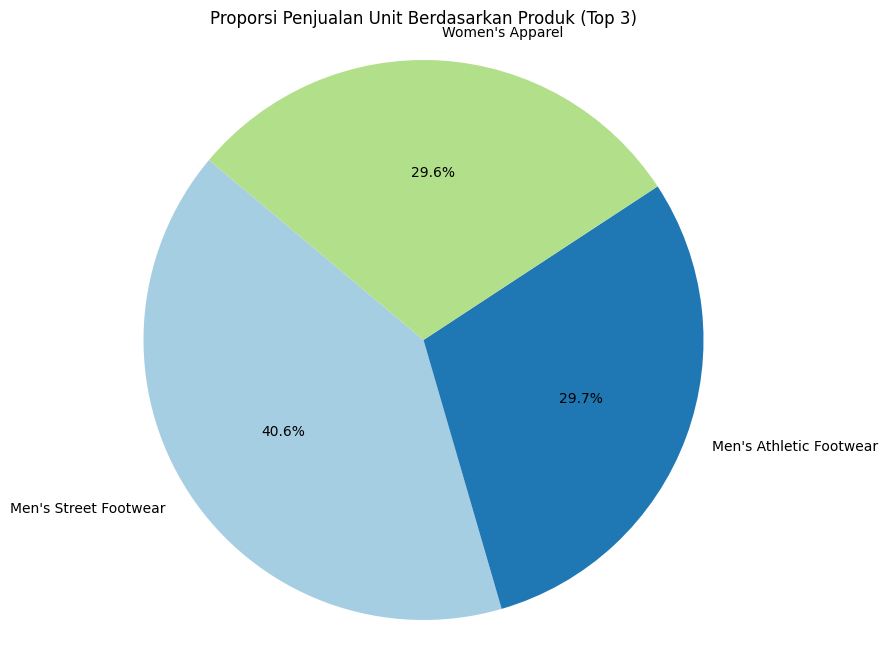

In [106]:
variabel = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)
variabel2 = variabel.head(3)

plt.figure(figsize=(10, 8))
variabel2.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi Penjualan Unit Berdasarkan Produk (Top 3)')
plt.ylabel('')
plt.axis('equal')
plt.show()

Dari pie chart yang dihasilkan atas proporsi penjualan produk tertinggi (Top 3), dapat kita lihat bahwa penjualan produk 3 teratas terdapat pada Men's Street Footwear sebesar 40.6%, kedua teratas ada Men's Athletic Footwear sebesar 29.7%, dan ketiga teratas adaWomens Apparel sebesar 29.6%

## **Distribution/Distribusi**

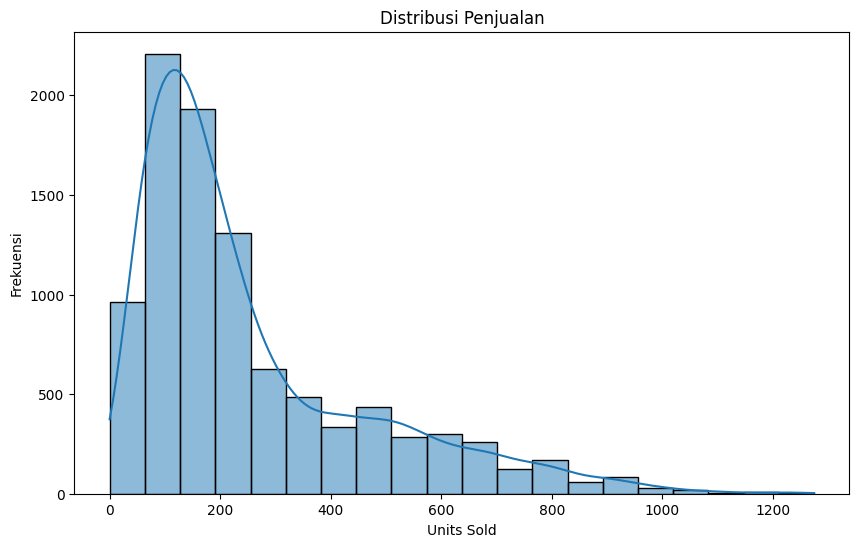

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Units Sold'], bins=20, kde=True)
plt.title('Distribusi Penjualan')
plt.xlabel('Units Sold')
plt.ylabel('Frekuensi')
plt.show()

Dari grafik yang telah ditampilkan, dapat diambil insight bahwa kebanyakan produk terjual dalam jumlah sedikit sampai sedang. Sedangkan produk yang terjual banyak itu hanya sedikit. Sebagian besar transaksi itu biasa-biasa saja, dan cuma beberapa yang benar-benar tinggi.

## **Relationship/Hubungan**

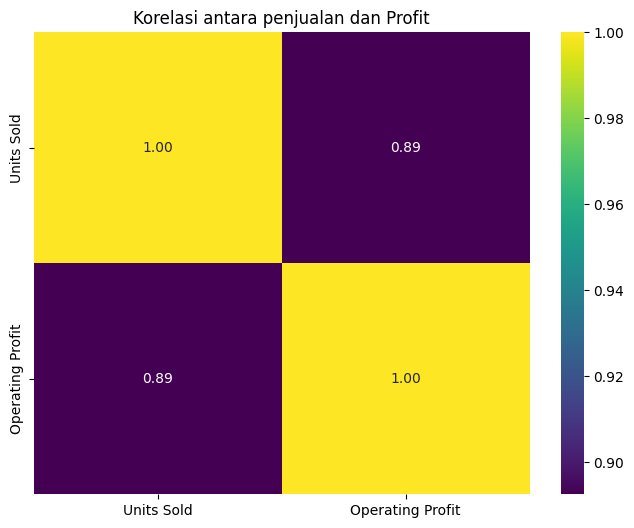

In [109]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Units Sold', 'Operating Profit']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara penjualan dan Profit')
plt.show()

Dari heatmap diatas, dapat diambil insight bahwa pada kolom Operating Profit dengan Units Sold,  kemungkinan memiliki hubungan bisa dikatakan besar. Hampir memiliki hubungan.